# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Telco.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.shape

(7043, 21)

In [5]:
# Convert Totalcharges to numerical
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

In [6]:
# Check NULL value
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# Replace NULL value as 0
df = df.fillna(value=0)

In [8]:
# Remove CustomerID
df.drop(['customerID'],axis=1,inplace=True)

In [9]:
#Convert all the Yes/No data to binary
columns_yes_no = ['Churn','Partner','Dependents','PhoneService','PaperlessBilling','OnlineSecurity','OnlineBackup','DeviceProtection','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for item in columns_yes_no:
    df[item].replace(to_replace = 'Yes',value=1,inplace=True)
    df[item].replace(to_replace = 'No',value=0,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [10]:
#Convert all the categorical data to binary
df = pd.get_dummies(df)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,...,1,0,0,1,0,0,0,0,1,0


In [11]:
df.corr()['Churn'].sort_values(ascending=False)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_0                           0.342637
TechSupport_0                              0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_0                             0.268005
DeviceProtection_0                         0.252481
MonthlyCharges                             0.193356
PaperlessBilling                           0.191825
SeniorCitizen                              0.150889
StreamingMovies_0                          0.130845
StreamingTV_0                              0.128916
StreamingTV_1                              0.063228
StreamingMovies_1                          0.061382
MultipleLines_Yes                          0.040102
PhoneService                               0.011942
gender_Female                              0.008612
gender_Male                               -0.008612
MultipleLine

In [12]:
df.drop(['gender_Female','gender_Male','PhoneService','MultipleLines_No phone service'],axis=1,inplace=True)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,29.85,29.85,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,0,56.95,1889.50,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,53.85,108.15,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,42.30,1840.75,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,70.70,151.65,1,1,0,...,1,0,0,1,0,0,0,0,1,0


# Model Training

In [13]:
y = df['Churn'].values
dropped = df.drop(columns=['Churn'])
X = dropped

In [14]:
# Scale the data using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
# Splite data into training and testing
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=24)

In [16]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
log_reg.predict(X_test)

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [18]:
log_reg.score(X_test,y_test)

0.8177946048272599

In [19]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [20]:
knn.predict(X_test)

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [21]:
knn.score(X_test,y_test)

0.7908187411263606

In [22]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
randomforest= RandomForestClassifier()
randomforest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
randomforest.predict(X_test)

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [24]:
randomforest.score(X_test,y_test)

0.7860861334595362

In [25]:
# Use 5-fold Cross Validation to get models' accuracy
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [log_reg, knn, randomforest]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print('Model accuracy of %s is: %0.4f'%(model_names[count],cv_score.mean()))
    count += 1

Model accuracy of Logistic Regression is: 0.7963
Model accuracy of KNN is: 0.7696
Model accuracy of Random Forest is: 0.7751


In [26]:
# Use Grid Search to Find Optimal Hyperparameters
from sklearn.model_selection import GridSearchCV

# print results
def print_grid_search_metrics(gs):
    print ("Highest score: %0.4f" % gs.best_score_)
    print ("Best parameters:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [27]:
# Logistic Regression
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1,5,10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
print_grid_search_metrics(Grid_LR)

Highest score: 0.7968
Best parameters:
	C: 1
	penalty: 'l1'


In [29]:
# KNN
parameters = {
    'n_neighbors':[3,5,7,10,15,20] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 5, 7, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
print_grid_search_metrics(Grid_KNN)

Highest score: 0.7791
Best parameters:
	n_neighbors: 20


In [31]:
# for Random Forest
parameters = {
    'n_estimators' : [40,60,80,100]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [40, 60, 80, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Highest score: 0.7862
Best parameters:
	n_estimators: 100


# Model Evaluation

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [34]:
# Calculate Accuarcy Scores
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    print (classifier)
    print ("Accuracy is: %0.4f" % accuracy)
    print ("precision is: %0.4f" % precision)
    print ("recall is: %0.4f" % recall)

# Print Confusion Matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Stay','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, cmap=plt.get_cmap('Blues'))
        plt.title('Confusion matrix of %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

Logistic Regression
Accuracy is: 0.8178
precision is: 0.6525
recall is: 0.5795


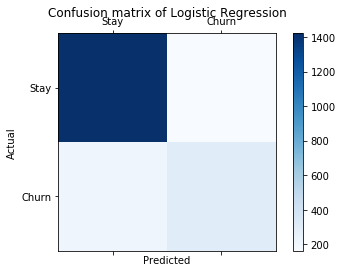

K Nearest Neighbors
Accuracy is: 0.7908
precision is: 0.6024
recall is: 0.4792


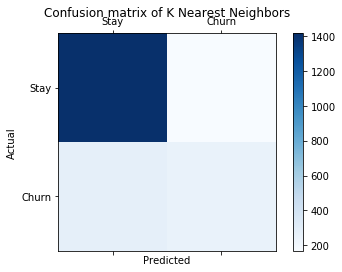

Random Forest
Accuracy is: 0.7861
precision is: 0.5969
recall is: 0.4432


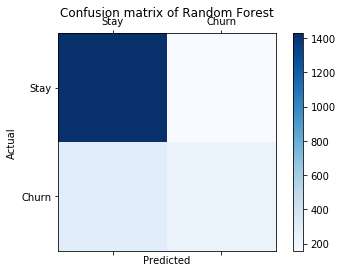

In [35]:
confusion_matrices = [
    ("Logistic Regression", confusion_matrix(y_test,log_reg.predict(X_test))),
    ("K Nearest Neighbors", confusion_matrix(y_test,knn.predict(X_test))),
    ("Random Forest", confusion_matrix(y_test,randomforest.predict(X_test))),
    ]

draw_confusion_matrices(confusion_matrices)

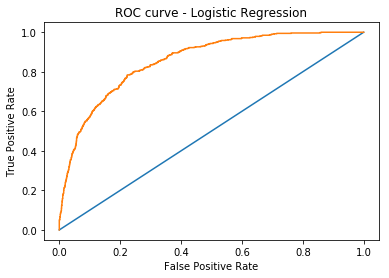

In [36]:
# ROC curve of Logistic Regression
from sklearn import metrics
from sklearn.metrics import roc_curve
probs = log_reg.predict_proba(X_test)
preds = probs[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, preds)
plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(fpr_lr, tpr_lr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Logistic Regression')
plt.show()

In [37]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.8566825590287735

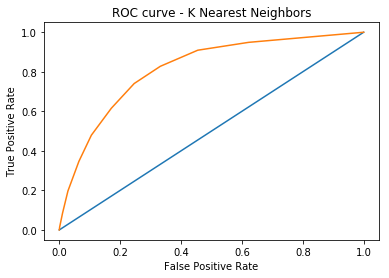

In [38]:
# KNN
probs = knn.predict_proba(X_test)
preds = probs[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, preds)
plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(fpr_lr, tpr_lr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - K Nearest Neighbors')
plt.show()

In [39]:
metrics.auc(fpr_lr,tpr_lr)

0.8141890115667718

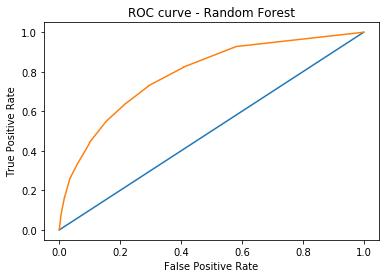

In [40]:
# Random Forest
probs = randomforest.predict_proba(X_test)
preds = probs[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, preds)
plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(fpr_lr, tpr_lr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Random Forest')
plt.show()

In [41]:
metrics.auc(fpr_lr,tpr_lr)

0.7890438294618105

Based on the Confusion Matrix and AUC Value, we can conclude that Logistic Regression is the best model in this case.

# Feature Importance

In [42]:
log_reg.coef_[0]
print ("Top 10 important attributes in our Logistic Regression Model")
for k,v in sorted(zip(map(lambda x: round(x, 3), log_reg.coef_[0]), \
                      dropped.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1]))[0:10]:
    print (v + ": " + str(k))

Top 10 important attributes in our Logistic Regression Model
tenure: -1.192
TotalCharges: 0.468
Contract_Two year: -0.351
MonthlyCharges: -0.316
Contract_Month-to-month: 0.309
InternetService_Fiber optic: 0.279
InternetService_DSL: -0.231
MultipleLines_No: -0.186
PaperlessBilling: 0.182
PaymentMethod_Electronic check: 0.119
